In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = sns.load_dataset('iris')
df = df.head(150)


In [3]:

df = df.drop('sepal_width',axis=1)


In [4]:
y = df.iloc[:,-1]
x = df.iloc[:,:-1]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=25,test_size=0.3)

In [5]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(max_depth=1)
tree_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=1)

In [6]:
import matplotlib.pyplot as plt

[Text(0.5, 0.75, 'x[1] <= 2.45\ngini = 0.665\nsamples = 105\nvalue = [33, 34, 38]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 33\nvalue = [33, 0, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.498\nsamples = 72\nvalue = [0, 34, 38]'),
 Text(0.625, 0.5, '  False')]

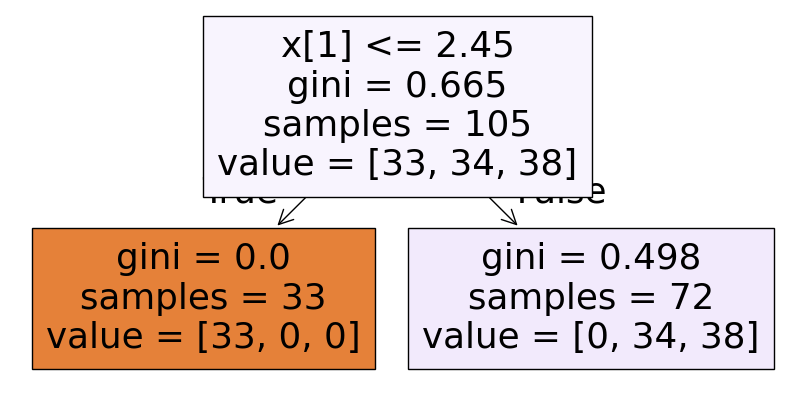

In [7]:
from sklearn import tree
plt.figure(figsize=(10,5))
tree.plot_tree(tree_model,filled=True)

In [8]:
n = df['petal_length'].shape[0]
df['weight'] = 1/n
df

,sepal_length,petal_length,petal_width,species,weight
0,5.1,1.4,0.2,setosa,0.006667
1,4.9,1.4,0.2,setosa,0.006667
2,4.7,1.3,0.2,setosa,0.006667
3,4.6,1.5,0.2,setosa,0.006667
4,5.0,1.4,0.2,setosa,0.006667
...,...,...,...,...,...
145,6.7,5.2,2.3,virginica,0.006667
146,6.3,5.0,1.9,virginica,0.006667
147,6.5,5.2,2.0,virginica,0.006667
148,6.2,5.4,2.3,virginica,0.006667


<Axes: xlabel='petal_length', ylabel='petal_width'>

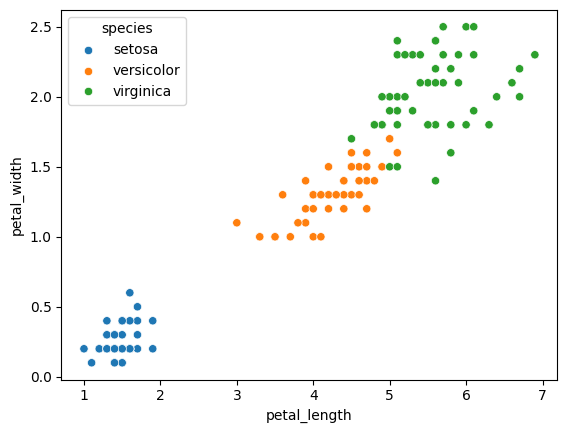

In [9]:
sns.scatterplot(x=df['petal_length'],  y=df['petal_width'],hue=df['species'])

In [10]:
df['y_pred'] = tree_model.predict(x)
df

,sepal_length,petal_length,petal_width,species,weight,y_pred
0,5.1,1.4,0.2,setosa,0.006667,setosa
1,4.9,1.4,0.2,setosa,0.006667,setosa
2,4.7,1.3,0.2,setosa,0.006667,setosa
3,4.6,1.5,0.2,setosa,0.006667,setosa
4,5.0,1.4,0.2,setosa,0.006667,setosa
...,...,...,...,...,...,...
145,6.7,5.2,2.3,virginica,0.006667,virginica
146,6.3,5.0,1.9,virginica,0.006667,virginica
147,6.5,5.2,2.0,virginica,0.006667,virginica
148,6.2,5.4,2.3,virginica,0.006667,virginica


In [11]:
def calculate_weight_error(error):
    return 0.5*np.log((1-error)/(error))

In [12]:
alpha = calculate_weight_error(0.006667)
print(alpha)
aa = alpha

2.501947985812446


In [13]:
def update_weight(row , alpha=aa):
    if row['species'] == row['y_pred']:
        return row['weight'] * np.exp(-alpha)
    else:
        return row['weight'] * np.exp(alpha)

In [14]:
df['updated weight']  = df.apply(update_weight,axis=1)
df

,sepal_length,petal_length,petal_width,species,weight,y_pred,updated weight
0,5.1,1.4,0.2,setosa,0.006667,setosa,0.000546
1,4.9,1.4,0.2,setosa,0.006667,setosa,0.000546
2,4.7,1.3,0.2,setosa,0.006667,setosa,0.000546
3,4.6,1.5,0.2,setosa,0.006667,setosa,0.000546
4,5.0,1.4,0.2,setosa,0.006667,setosa,0.000546
...,...,...,...,...,...,...,...
145,6.7,5.2,2.3,virginica,0.006667,virginica,0.000546
146,6.3,5.0,1.9,virginica,0.006667,virginica,0.000546
147,6.5,5.2,2.0,virginica,0.006667,virginica,0.000546
148,6.2,5.4,2.3,virginica,0.006667,virginica,0.000546


In [15]:
df['updated weight'].sum()

4.123366307653871

In [16]:
df['Normalized weight'] = df['updated weight']/df['updated weight'].sum()
df

,sepal_length,petal_length,petal_width,species,weight,y_pred,updated weight,Normalized weight
0,5.1,1.4,0.2,setosa,0.006667,setosa,0.000546,0.000132
1,4.9,1.4,0.2,setosa,0.006667,setosa,0.000546,0.000132
2,4.7,1.3,0.2,setosa,0.006667,setosa,0.000546,0.000132
3,4.6,1.5,0.2,setosa,0.006667,setosa,0.000546,0.000132
4,5.0,1.4,0.2,setosa,0.006667,setosa,0.000546,0.000132
...,...,...,...,...,...,...,...,...
145,6.7,5.2,2.3,virginica,0.006667,virginica,0.000546,0.000132
146,6.3,5.0,1.9,virginica,0.006667,virginica,0.000546,0.000132
147,6.5,5.2,2.0,virginica,0.006667,virginica,0.000546,0.000132
148,6.2,5.4,2.3,virginica,0.006667,virginica,0.000546,0.000132


In [17]:
df['Normalized weight'].sum()

1.0000000000000002